# Excercise: Eigen Face

Here, we will look into ability of PCA to perform dimensionality reduction on a set of Labeled Faces in the Wild dataset made available from scikit-learn. Our images will be of shape (62, 47). This problem is also famously known as the eigenface problem. Mathematically, we would like to find the principal components (or eigenvectors) of the covariance matrix of the set of face images. These eigenvectors are essentially a set of orthonormal features depicts the amount of variation between face images. When plotted, these eigenvectors are called eigenfaces.

#### Imports

In [30]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import pi
from sklearn.datasets import fetch_lfw_people

import seaborn as sns; sns.set()

#### Setup data

In [31]:
faces = fetch_lfw_people(min_faces_per_person=8)
X = faces.data
y = faces.target

print(faces.target_names)
print(faces.images.shape)

['Abdullah Gul' 'Adrien Brody' 'Al Gore' 'Alejandro Toledo' 'Ali Naimi'
 'Alvaro Uribe' 'Amelie Mauresmo' 'Ana Palacio' 'Andre Agassi'
 'Andy Roddick' 'Angelina Jolie' 'Ann Veneman' 'Anna Kournikova'
 'Antonio Palocci' 'Ari Fleischer' 'Ariel Sharon' 'Arnold Schwarzenegger'
 'Atal Bihari Vajpayee' 'Bill Clinton' 'Bill Frist' 'Bill Gates'
 'Bill Graham' 'Bill McBride' 'Bill Simon' 'Bob Hope' 'Britney Spears'
 'Carlos Menem' 'Carlos Moya' 'Catherine Zeta-Jones' 'Celine Dion'
 'Cesar Gaviria' 'Charles Moose' 'Charles Taylor' 'Colin Farrell'
 'Colin Powell' 'Condoleezza Rice' 'David Beckham' 'David Nalbandian'
 'Dick Cheney' 'Dominique de Villepin' 'Donald Rumsfeld' 'Edmund Stoiber'
 'Eduardo Duhalde' 'Fernando Gonzalez' 'Fernando Henrique Cardoso'
 'Fidel Castro' 'George Clooney' 'George HW Bush' 'George Robertson'
 'George W Bush' 'Gerhard Schroeder' 'Gerry Adams'
 'Gloria Macapagal Arroyo' 'Gonzalo Sanchez de Lozada' 'Gordon Brown'
 'Gray Davis' 'Guillermo Coria' 'Halle Berry' 'Hamid Kar

Since our images is of the shape (62, 47), we unroll each image into a single row vector of shape (1, 2914). This means that we have 2914 features defining each image. These 2914 features will result into 2914 principal components in the PCA projection space. Therefore, each image location contributes more or less to each principal component.

#### Implement Eigen Faces

# Adding noise to images

We now add gaussian noise to the images. Will PCA be able to effectively perform dimensionality reduction? 

In [32]:
def plot_noisy_faces(noisy_faces):
    fig, axes = plt.subplots(2, 10, figsize=(10, 2.5),
                             subplot_kw={'xticks':[], 'yticks':[]},
                             gridspec_kw=dict(hspace=0.1, wspace=0.1))
    for i, ax in enumerate(axes.flat):
      ax.imshow(noisy_faces[i].reshape(62, 47), cmap='binary_r')

Below we plot first twenty noisy input face images.

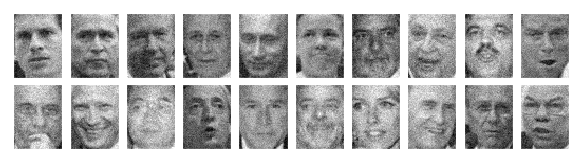

In [33]:
np.random.seed(42)
noisy_faces = np.random.normal(X, 15)
plot_noisy_faces(noisy_faces)

In [34]:
def pca_transform(X_input, num_components):
    # Centering our data (Step 1)
    X_mean = np.mean(X_input, axis=0)
    X_mean = X_mean.reshape(1, -1)
    X_input -= X_mean

    num_examples = (X_input.shape)[0]
    constant = float(1)/float(num_examples - 1)

    cov_matrix = constant * np.dot(X_input.T, X_input)
    cov_matrix = np.array(cov_matrix, dtype=float)

    eigvals, eigvecs = np.linalg.eig(cov_matrix)

    idx = eigvals.argsort()[::-1]
    eigvals = eigvals[idx][:num_components]
    eigvecs = np.atleast_1d(eigvecs[:, idx])[:, :num_components]

    X_projected = np.dot(X_input, eigvecs)
    eigvecs = eigvecs.T
    return X_projected, eigvecs, eigvals

('Principal Components required for 95% variance preservation: ', 178)


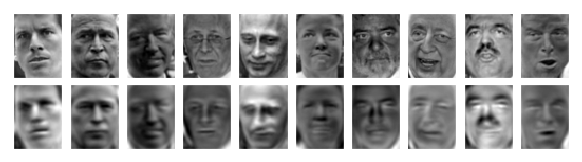

In [35]:
# Perform PCA on input data X
max_components = np.shape(X)[1]
X_projected, principal_components, variances = pca_transform(X, max_components)

###################################

# Question 3.1 for Original dataset
total_var = np.sum(variances)
explained_variance_ratio = variances/total_var
cumVarSum = np.cumsum(explained_variance_ratio)

for i in range(1, 2914):
    if cumVarSum[i] > 0.95:
        break
print("Principal Components required for 95% variance preservation: ", i+1)

###################################
num_components = 100
output = np.dot(X_projected[:, :num_components], principal_components[:num_components, :])

# Question 3.2 for Original dataset
fig, ax = plt.subplots(2, 10, figsize=(10, 2.5),
                       subplot_kw={'xticks':[], 'yticks':[]},
                       gridspec_kw=dict(hspace=0.1, wspace=0.1))
for i in range(10):
    ax[0, i].imshow(X[i].reshape(62, 47), cmap='binary_r')     # input
    ax[1, i].imshow(output[i].reshape(62, 47), cmap='binary_r')     # output

###################################

('Principal Components required for 95% variance preservation: ', 1014)


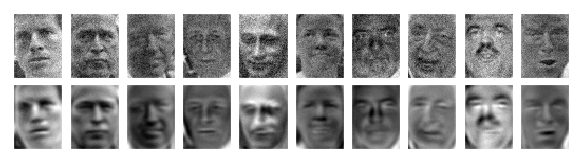

In [36]:
max_components = np.shape(noisy_faces)[1]
X_projected, principal_components, variances = pca_transform(noisy_faces, max_components)

###################################

# Question 3.1 for Noisy dataset
total_var = np.sum(variances)
explained_variance_ratio = variances/total_var
cumVarSum = np.cumsum(explained_variance_ratio)

for i in range(1, 2914):
    if cumVarSum[i] > 0.95:
        break
print("Principal Components required for 95% variance preservation: ", i+1)

###################################

# Question 3.2 for Noisy dataset
num_components = 100
output = np.dot(X_projected[:, :num_components], principal_components[:num_components, :])

# Question 3.2 for Original dataset
fig, ax = plt.subplots(2, 10, figsize=(10, 2.5),
                       subplot_kw={'xticks':[], 'yticks':[]},
                       gridspec_kw=dict(hspace=0.1, wspace=0.1))
for i in range(10):
    ax[0, i].imshow(noisy_faces[i].reshape(62, 47), cmap='binary_r')     # input
    ax[1, i].imshow(output[i].reshape(62, 47), cmap='binary_r')     # output

###################################